In [1]:
# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib
%matplotlib inline
plt.style.use('ggplot')

# display
from IPython.display import display

# autoreload
%load_ext autoreload
%autoreload 2

# warnings
import warnings
warnings.filterwarnings('ignore')

# fix random seed
from numpy.random import seed as set_random_seed
set_random_seed(42)

# explainability
# import shap, lime, eli5
# shap.initjs()

import datetime
import emoji

import streamlit as st
def cache(f):
    return f
st.cache = cache

In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Alon\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rc

In [4]:
from utils import read_chat
chat = read_chat()

In [9]:
print(chat)

AttributeError: 'NoneType' object has no attribute 'axes'

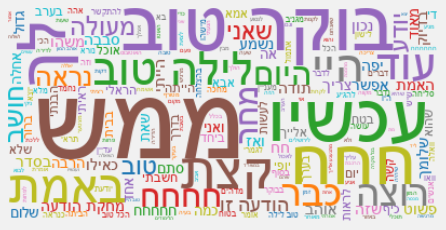

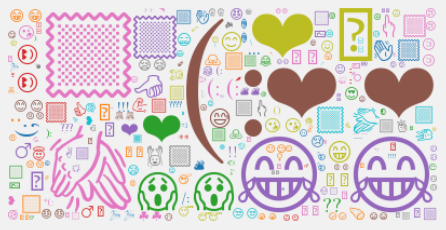

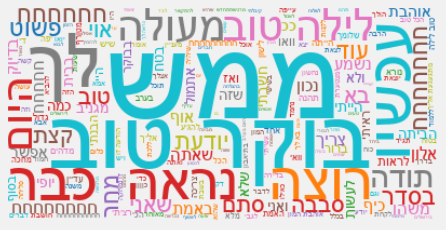

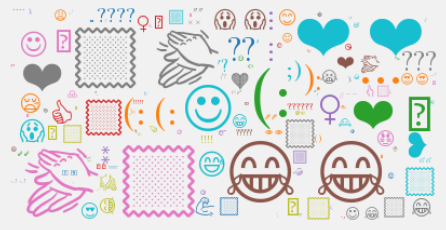

In [3]:
from apps.statistics import generate_emojicloud, generate_wordcloud, get_text_for_name, display_cloud

for name in chat['name'].unique():
    text_series = get_text_for_name(chat, name)
    display_cloud(generate_wordcloud(text_series), with_streamlit=False)
    display_cloud(generate_emojicloud(text_series), with_streamlit=False)

In [25]:
import streamlit as st
import matplotlib.pyplot as plt
import emoji
from apps.extras.hebrew_stopwords import hebrew_stopwords, hebrew_alphabet
import re
from utils import is_chat_exist, read_chat
from wordcloud import WordCloud
import string
from config import DATA_DIR

MEDIA_TOKEN = '<M>'
URL_TOKEN = '<url>'
TOKENS = [MEDIA_TOKEN, URL_TOKEN]

def preprocess_text_for_wordcloud(text):
    if text == '<המדיה לא נכללה>':
        return MEDIA_TOKEN
    text = re.sub('https?://\S+|www\.\S+', URL_TOKEN, text)
    return text
def reverse_text(text):
    return text[::-1]


In [5]:
chat = read_chat()

In [83]:
name = chat['name'].unique()[0]
text = get_text_for_name(chat, name)
name

'Alon Wolf 🐺'

In [84]:
def average_massage(char):
    count = text.str.contains(char).sum()
    if count == 0:
        return 'אף פעם'
    return int(np.round(len(text) / count))
average_massage('❤')

17

In [85]:
average_massage('אוהב')

96

In [86]:
average_massage('אוהב אותך')

185

In [87]:
average_massage('מתגעגע')

349

In [95]:
average_massage('[' + ''.join(list(emoji.UNICODE_EMOJI['en'].keys()))+ ']')

4

In [ ]:
def tokenize_text(text):
    return text.str.split(' ')

In [40]:
emojis = list(emoji.UNICODE_EMOJI['en'].keys())
def extract_emojis(text):
    return ''.join([c for c in text if c  in emojis ])

def average_emoji():
    text.apply(extract_emojis)
    return int(np.round(len(text) / (only_emojis != '').sum()))
average_emoji()

4

In [51]:
def average_massage_len():
    return np.round(tokenize_text(text).apply(len).sum() / len(text), 2)
average_massage_len()

3.83

In [52]:
def max_massage_len():
    return max(tokenize_text(text).apply(len))
max_massage_len()

438

<AxesSubplot:ylabel='Frequency'>

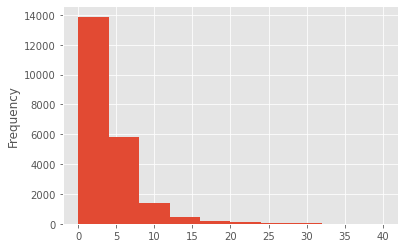

In [90]:
series = tokenize_text(text).apply(len)
series.plot.hist(range = (0,np.quantile(series,0.998)))

In [99]:
np.histogram(series, bins = 50, range = (0,np.quantile(series,0.998)))

(array([   0, 7102, 3164, 3618,    0, 2326, 1635, 1116,  773,    0,  515,
         379,  293,  183,    0,  156,  141,  105,   58,    0,   53,   55,
          28,   36,    0,   40,   18,   18,   15,    0,   11,   11,    6,
          10,    0,    7,    5,    6,    8,    0,    2,    4,    0,    5,
           0,    3,    3,    4,    2,    5], dtype=int64),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 10.4, 11.2, 12. , 12.8, 13.6, 14.4, 15.2, 16. , 16.8,
        17.6, 18.4, 19.2, 20. , 20.8, 21.6, 22.4, 23.2, 24. , 24.8, 25.6,
        26.4, 27.2, 28. , 28.8, 29.6, 30.4, 31.2, 32. , 32.8, 33.6, 34.4,
        35.2, 36. , 36.8, 37.6, 38.4, 39.2, 40. ]))

In [18]:
s = extract_emojis(''.join(text))

KeyboardInterrupt: 

In [ ]:
s

In [14]:
text.apply(extract_emojis)

KeyboardInterrupt: 

In [ ]:
s

In [7]:
text.str.apply('contains')

0                            איזה אתרים קדושים יש בירושלים
1        לפי מקומות - תל-אביב - 'משימה שקשורה לים'\nירו...
2                                                לדוגמא 👆🏼
5                                                      <M>
6                                              זה נכון חחח
                               ...                        
39994                       זה * בול * מה שרציתי שיהיה לנו
39995                                                  <M>
39996                                          איזה כיף (:
39997                         תאמרי לה לשים אותם גבוה גבוה
39998                                                  <M>
Name: text, Length: 21960, dtype: object

In [2]:
from clearml import Task
task = Task.init(project_name="wolf_test", task_name="wolf_test")

In [ ]:
Task.current_task().upload_artifact(name='a_file', artifact_object='local_file.bin')
Task.current_task().upload_artifact(name='numpy', artifact_object=np.ones(4,4))

In [ ]:
from clearml import Logger
Logger.current_logger().report_scalar(graph='metric', series='variant', value=13.37, iteration=counter)